# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
# your code here
import pandas as pd          # Manejo y análisis de datos
import numpy as np           # Operaciones numéricas
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns    

In [3]:
# Cargar dataset desde Hugging Face directamente
!pip install datasets --quiet

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [11]:
# Cargar el dataset
ds = load_dataset("dwisaji/twitter-minggu-sentiment-dataset")

# Convertir la partición 'train' en un DataFrame de pandas
df = ds["train"].to_pandas()

# Mostrar las primeras filas
df.head()


You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /home/jovyan/.cache/huggingface/datasets/dwisaji___csv/dwisaji--twitter-minggu-sentiment-dataset-8eafc905a432401d/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

,tweet,sentiment,label,score
0,RT @sukajajan_x: Baju kemeja motif untuk kulia...,neutral,1,0.947212
1,RT @LOKALVideo08: abang sales gue grepein di m...,neutral,1,0.985920
2,RT @hazelssie: ☁️totebag kiyowo☁️\n\n⭐️4.9 htt...,neutral,1,0.977968
3,@citrabellana Malam minggu ja yang kada mampu ...,neutral,1,0.961750
4,RT @cosxinus: Tas sling bag canvas buat coolye...,neutral,1,0.950132


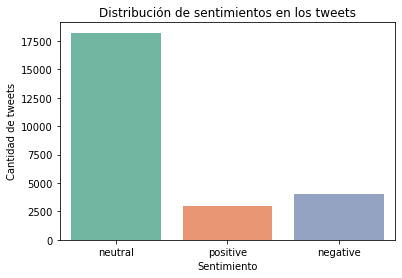

neutral     0.723501
negative    0.159309
positive    0.117189
Name: sentiment, dtype: float64

In [12]:
#¿Cómo está distribuido el sentimiento de los tweets?
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribución de sentimientos en los tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de tweets')
plt.show()

df['sentiment'].value_counts(normalize=True)


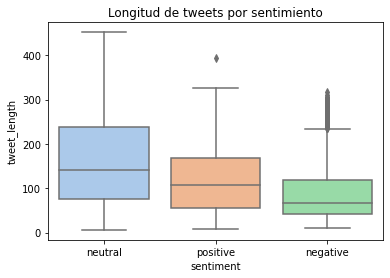

sentiment
negative     90.936207
neutral     156.915885
positive    122.198509
Name: tweet_length, dtype: float64

In [13]:
#¿Qué tan largos son los tweets según su sentimiento?
df['tweet_length'] = df['tweet'].apply(len)
sns.boxplot(x='sentiment', y='tweet_length', data=df, palette='pastel')
plt.title('Longitud de tweets por sentimiento')
plt.show()

df.groupby('sentiment')['tweet_length'].mean()


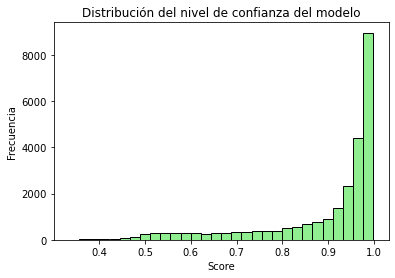

In [15]:
#¿Cuál es la distribución del nivel de confianza (score)?
plt.hist(df['score'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución del nivel de confianza del modelo')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
#¿Qué tipo de sentimiento tiene el puntaje (score) más alto en promedio?
promedios = df.groupby('sentiment')['score'].mean()
print(promedios)

sentiment
negative    0.862130
neutral     0.912929
positive    0.815710
Name: score, dtype: float64


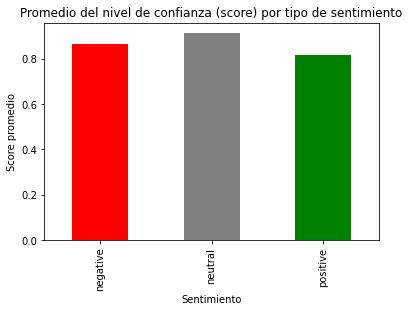

In [18]:
import matplotlib.pyplot as plt

promedios.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Promedio del nivel de confianza (score) por tipo de sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Score promedio')
plt.show()

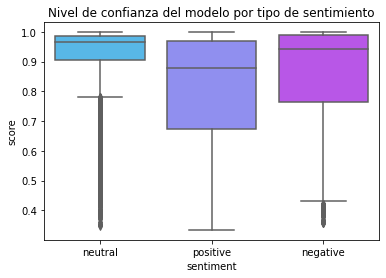

sentiment
negative    0.862130
neutral     0.912929
positive    0.815710
Name: score, dtype: float64

In [19]:
#¿Existen diferencias notables en la confianza (score) entre los sentimientos?
sns.boxplot(x='sentiment', y='score', data=df, palette='cool')
plt.title('Nivel de confianza del modelo por tipo de sentimiento')
plt.show()

df.groupby('sentiment')['score'].mean()


In [20]:
#¿Hay correlación entre la longitud del tweet y el score del modelo?
corr = df[['tweet_length', 'score']].corr()
corr


,tweet_length,score
tweet_length,1.000000,0.089679
score,0.089679,1.000000


In [22]:
#¿Existen valores faltantes o incompletos en el dataset?
df.isnull().sum()

tweet           0
sentiment       0
label           0
score           0
tweet_length    0
clean_tweet     0
dtype: int64

In [24]:
print("Tamaño original:", df.shape)
df = df.dropna()
print("Tamaño después de la limpieza:", df.shape)

Tamaño original: (25190, 6)
Tamaño después de la limpieza: (25190, 6)


In [25]:
valores_faltantes = df.isnull().sum().sum()
print(f"Valores faltantes después de la limpieza: {valores_faltantes}")

Valores faltantes después de la limpieza: 0
